In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
header = ['name', 'letter', 'method', 'Npl', 'P', 'Pup', 'Pdown', 'a', 'aup', 'adown', 'e', 'eup', 'edown', 'm', 'mup', 'mdown', 'r', 'rup', 'rdown', 'Ms', 'Msup', 'Msdown', 'Rs', 'Rsup', 'Rsdown']
usecols = [1,2,3,4,5,6,7,9,10,11,13,14,15,17,18,19,22,23,24,31,32,33,36,37,38]
data = pd.read_csv("planets.csv",names=header, delimiter=',',usecols=usecols,skiprows=48)
data.head()

,name,letter,method,Npl,P,Pup,Pdown,a,aup,adown,...,mdown,r,rup,rdown,Ms,Msup,Msdown,Rs,Rsup,Rsdown
0,24 Sex,b,Radial Velocity,2,452.8,2.1,-4.5,1.333,0.004,-0.009,...,-0.380,NaN,NaN,NaN,1.54,0.08,-0.08,4.90,0.08,-0.08
1,24 Sex,c,Radial Velocity,2,883.0,32.4,-13.8,2.080,0.050,-0.020,...,-0.220,NaN,NaN,NaN,1.54,0.08,-0.08,4.90,0.08,-0.08
2,47 UMa,b,Radial Velocity,3,1078.0,2.0,-2.0,2.100,0.020,-0.020,...,-0.060,NaN,NaN,NaN,1.03,0.05,-0.05,1.23,NaN,NaN
3,47 UMa,c,Radial Velocity,3,2391.0,100.0,-87.0,3.600,0.100,-0.100,...,-0.073,NaN,NaN,NaN,1.03,0.05,-0.05,1.23,NaN,NaN
4,47 UMa,d,Radial Velocity,3,14002.0,4018.0,-5095.0,11.600,2.100,-2.900,...,-0.480,NaN,NaN,NaN,1.03,0.05,-0.05,1.23,NaN,NaN


In [72]:
min_mass = 0.3
period_ratios = []

systems = np.unique(data['name'])
for s in systems:
    sys = data.loc[data['name']==s, ["name","letter","Npl","P","m","Ms"]]
    #if np.any(sys["m"] > min_mass) and np.any(sys["P"] < 200):
    if len(np.where((sys["m"]>min_mass) & (sys["P"]<200))[0]) > 0:  #Jovian planet inside of 200 days
        P = np.sort(sys["P"].values)
        P_ratio = P[1:] / P[0:-1]
        for p in P_ratio:
            period_ratios.append(p)

period_ratios = np.sort(np.asarray(period_ratios))
period_ratios = period_ratios[period_ratios < 5]

Out of 63 total systems, 0.29 percent are 0.04 wide of MMR


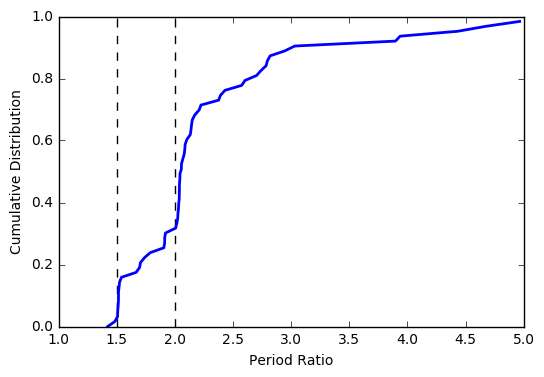

In [76]:
MMR = [2,1.5]
N_MMR = 0
N = float(len(period_ratios))
thresh = 0.04
for m in MMR:
    plt.plot([m,m],[0,1],'k--')
    N_MMR += len(period_ratios[(np.abs(period_ratios - m) < thresh) & (period_ratios > m)])

plt.plot(period_ratios, np.arange(N)/N, lw=2)
plt.xlabel("Period Ratio")
plt.ylabel("Cumulative Distribution")
plt.savefig("Jovian_MMR_CDF.pdf")
print "Out of %d total systems, %.2f percent are %.2f wide of MMR"%(N,N_MMR/N, thresh)